# What's in this notebook?
Creating features:
- length
- number of different types of punctuation (!, ?, ", ..., $)
- if there are words in all caps
- number of curse words
- number of first person pronouns
- number of second and third person pronouns
- if they use WIBTA versus AITA
- average number of words per sentence
- sentiment
- similarity between title and description
- count vectorization (or tf-idf or word2vec, etc?)

Visualization of these features

Note: In this notebook, posts that are classified as "not the asshole" are referred to as "NTA" and posts that are classified as "asshole" as referred to as "TA".

In [510]:
import pandas as pd

In [2]:
import pickle

with open('preprocessed_data.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)

data

,judgement,id,description,title,url,author_flair
id,,,,,,
1fy0bx,0,1fy0bx,I work in an office that requires me to wear a...,AItA: I like air conditioning and my coworkers...,http://www.reddit.com/r/AmItheAsshole/comments...,Asshole #1
1ytxov,1,1ytxov,[Here is the post in question](http://www.redd...,[AITA] I wrote an explanation in TIL and came ...,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yu29c,1,1yu29c,"My parents are diabetic, morbidly obese, and a...",[AITA] Threw my parent's donuts away,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yu8hi,0,1yu8hi,I was four.,I told a goth girl she looked like a clown.,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yuc78,1,1yuc78,http://www.reddit.com/r/HIMYM/comments/1vvfkq/...,[AItA]: Argument I had with another redditor i...,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yugsc,1,1yugsc,I love the musical *Les Miserables*. A coworke...,AITA Had a disagreement about Les Miserables w...,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yuj95,1,1yuj95,Backstory: I'm a semi-professional competitive...,"[AITA] I 'hacked' our house router, changed th...",http://www.reddit.com/r/AmItheAsshole/comments...,None
1yukgb,0,1yukgb,2 Years ago my friend makes out with this girl...,[AITA] High School bullshit,http://www.reddit.com/r/AmItheAsshole/comments...,None
1yux10,1,1yux10,His name is Scoop. \n\nOver the two years I ha...,[ATIA] I permanently give a customer decaf.,http://www.reddit.com/r/AmItheAsshole/comments...,None


In [17]:
data = data.astype({'judgement': 'int32'}, inplace=True)

In [18]:
data.dtypes

judgement        int32
id              object
description     object
title           object
url             object
author_flair    object
length           int64
dtype: object

## Feature: Length of description
Do TA posts tend to me more lengthy?

In [5]:
import re 

data['length'] = data['description'].apply(lambda x: len(re.split(r'\n|\s', x)))

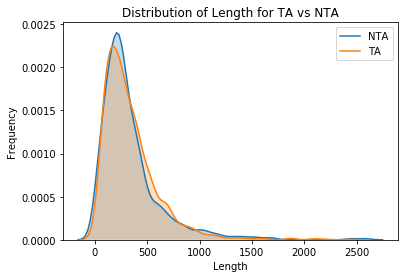

In [22]:
import seaborn as sns
ax = sns.kdeplot(data[['length', 'judgement']][data['judgement'] == 0]['length'], shade = True, label="NTA")
ax = sns.kdeplot(data[['length', 'judgement']][data['judgement'] == 1]['length'], shade = True, label="TA")
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Length for TA vs NTA')

fig = ax.get_figure()

## Feature: Punctuation Frequency
There are a few kinds of punctuation we'll look at --
- ?
- !
- "
- ...
- $

In [170]:
def punc_count(punc, sentence):
    return sum(1 for char in sentence if char == punc)

#punc_count('!', 'hello!!!hi!')

data['exclam_count'] = data.apply(lambda x: punc_count('!', x.description), axis=1)
data['question_count'] = data.apply(lambda x: punc_count('?', x.description), axis=1)
# divide quotes by 2 since they come in pairs
data['quote_count'] = data.apply(lambda x: punc_count('"', x.description)/2, axis=1)
data['dollar_count'] = data.apply(lambda x: punc_count('$', x.description), axis=1)

In [179]:
def ellipse_count(sentence):
    return sum(1 for char in sentence.split('...')) - 1
    
data['ellipse_count'] = data.apply(lambda x: ellipse_count(x.description), axis=1)

In [187]:
sorted(data[punc_dict[1]].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 19, 23, 26]

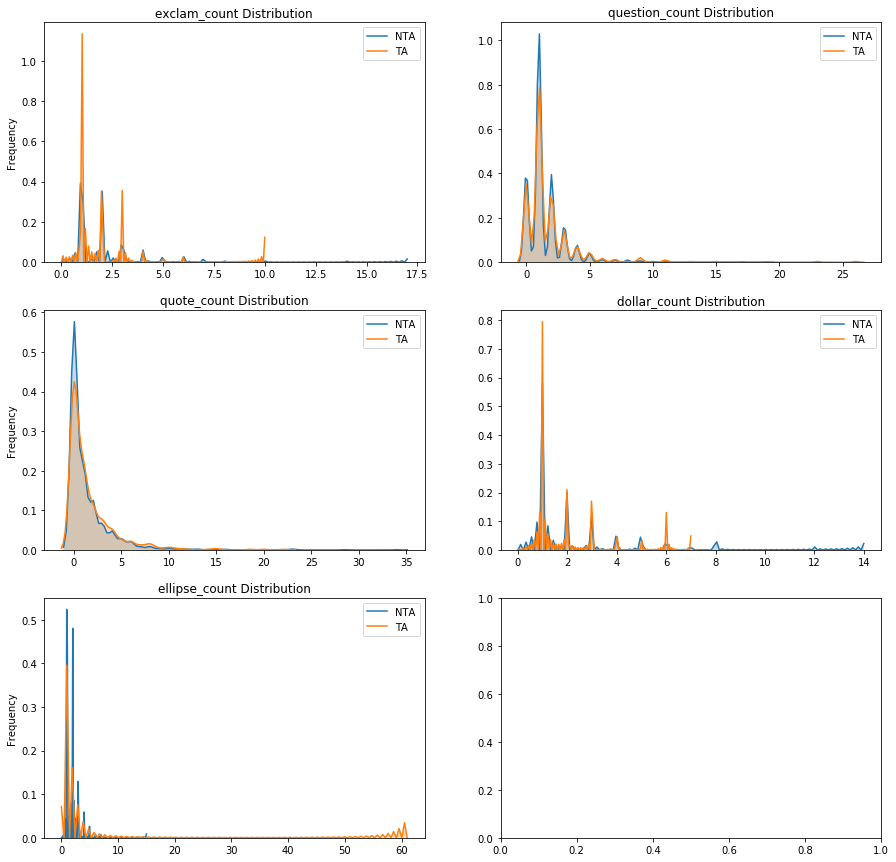

In [246]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(3, 2)
f.set_size_inches(15, 15)
punc_dict = {0: 'exclam_count', 1: 'question_count', 2: 'quote_count',
            3: 'dollar_count', 4: 'ellipse_count'}
for i in range(0, 2):
#     sns.distplot(data[data['judgement']==1][punc_dict[i]], 
#                 label='TA', ax=axes[i], kde=False, color='black')
#     sns.distplot(data[data['judgement']==0][punc_dict[i]], 
#                 label='NTA', ax=axes[i], kde=False, color='green')
    sns.kdeplot(data[data['judgement'] == 0][punc_dict[i]], shade = True, label="NTA", ax=axes[0][i])
    sns.kdeplot(data[data['judgement'] == 1][punc_dict[i]], shade = True, label="TA", ax=axes[0][i])
    axes[0][i].legend()
    axes[0][i].set(title=f'{punc_dict[i]} Distribution')

for i in range(2, 4):
#     sns.distplot(data[data['judgement']==1][punc_dict[i]], 
#                 label='TA', ax=axes[i], kde=False, color='black')
#     sns.distplot(data[data['judgement']==0][punc_dict[i]], 
#                 label='NTA', ax=axes[i], kde=False, color='green')
    sns.kdeplot(data[data['judgement'] == 0][punc_dict[i]], shade = True, label="NTA", ax=axes[1][i-2])
    sns.kdeplot(data[data['judgement'] == 1][punc_dict[i]], shade = True, label="TA", ax=axes[1][i-2])
    axes[1][i-2].legend()
    axes[1][i-2].set(title=f'{punc_dict[i]} Distribution')
    
for i in range(4, 5):
#     sns.distplot(data[data['judgement']==1][punc_dict[i]], 
#                 label='TA', ax=axes[i], kde=False, color='black')
#     sns.distplot(data[data['judgement']==0][punc_dict[i]], 
#                 label='NTA', ax=axes[i], kde=False, color='green')
    sns.kdeplot(data[data['judgement'] == 0][punc_dict[i]], shade = True, label="NTA", ax=axes[2][i-4])
    sns.kdeplot(data[data['judgement'] == 1][punc_dict[i]], shade = True, label="TA", ax=axes[2][i-4])
    axes[2][i-4].legend()
    axes[2][i-4].set(title=f'{punc_dict[i]} Distribution')
    
for i in range(0, 3):    
    axes[i][0].set(ylabel='Frequency')



## Feature: Do they write any words in all caps?
This only includes actual words, not abbrevations like 'ER' for 'emergency room'. Checking if it was a word was tricky and a bit messy.

In [336]:
# getting a dictionary
import urllib.request

dictionary = [re.sub(r'b|\\n|\'', '',str(line)) for line in urllib.request.urlopen('https://users.cs.duke.edu/~ola/ap/linuxwords')]
# from nltk.corpus import words

def count_caps(sentence):
    count = 0
    # split sentence on common word splitters like punctuation or spaces.
    for x in re.split(r'[.,"!()\'?]+|\s|\n', sentence):
        # make sure there's an actual word
        if x != '':
            # if it's not a word formatted as "word" or "Word"
            if not(x in dictionary or (x[0].lower()+x[1:] in dictionary)):
                # and if it's an actual word and not "AACCKK", or something like that
                if x.lower() in dictionary:
                    count += 1 
    return count
#     return sum(1 for word in re.split(r'[.,"!()\'?]+|\s', sentence) 
#                if word in words.words() and (word.lower() == word or word.title() == word))

data.apply(lambda x: count_caps(x.description), axis=1)

NOT
VERY
EVERYTHING
AND
THREW
THEM
IN
THE
FOUNTAIN
REALLY
CONSTANTLY
OF
OF
OF
OF
AM
ALL
NIGHT
AM
AM
VERY
SAID
REALLY
FULL
NAME
US
THAT
ARE
ARE
YOU
SHUT
THE
UP
DON
SAY
THAT
OH
YOU
TOOK
THE
TEST
GET
IT
MAN
SLOW
HATING
NEW
OUNCE
HE
HIS
US
SKip
EVERY
TIME
LEAST
CLICKED
AM
SO
ONCE
HARD
PROMISED
NOT
ANYTHING
SO
SO
SO
SO
AND
AND
AM
AM
AM
AM
REALLY
LOT
YOU
SUCK
MY
SERIOUSLY
MY
JUST
FINE
PERSONAL
EXPERIENCES
YES
DON
CARE
HIM
HE
AT
EACH
SO
HAVE
EVERYTHING
NOT
WORST
PERSON
ALIVE
TRY
THE
OPPOSITE
WAY
NEED
SHOULD
SURE
OH
VERY
NOT
TYPO
TOTALLY
DISAGREE
GET
OFF
THE
TRACKS
WHILE
YOU
WERE
DATING
SOMEONE
ELSE
ALL
DAY
LONG
WANTS
TO
HEAR
THAT
DEPRESSING
SHIT
IT
AGAIN
STILL
AM
VERY
SO
AM
AM
DON
TEXT
AND
DRIVE
PUT
DOWN
THAT
PHONE
NOW
STILL
KNOW
KNOW
THEY
WERE
TOTALLY
AM
STILL
THAT
ME
HER
HER
AM
OVER
YEAR
REALLY
ALL
WITHOUT
MY
AT
THE
TIME
EVERY
DAY
AFTER
WE
HAD
FINISHED
LOT
STEM
MULTIPLE
IF
YOU
DON
LIKE
IT
GET
REAL
AND
OF
MY
HOUSE
YOU
WANT
RESPECT
GET
OUT
TIRED
OF
YOUR
SHIT
AND
DONE
US
CANNOT
US
YOU
AM
THE
I

id
1fy0bx    0
1ytxov    0
1yu29c    0
1yu8hi    0
1yuc78    0
1yugsc    1
1yuj95    0
1yukgb    0
1yux10    0
1yux60    0
1yvb3n    0
1yvd1v    0
1yvjiw    2
1yvl8z    0
1yw0t4    6
1yx8vp    0
1yxbgt    0
1yxnp3    0
1yy4gj    0
1yy4n3    0
1yy70j    0
1yyach    0
1yyfen    0
1yz27l    0
1yztv6    0
1yzwl6    0
1z02r7    0
1z245r    1
1z2r6y    0
1z313z    0
         ..
73o31i    2
74zqrn    0
75b49v    1
7k0k9i    0
7l2hf4    1
7lcgz6    0
7lgtb6    0
7lgv4y    0
7lhlsb    0
7lkaat    1
7ll4i6    1
7ln48m    0
7loai6    0
7lohkj    1
7lqo5n    0
7lr6me    0
7lse9n    0
7lsi7c    1
7lsmyq    0
7ltuvf    0
7lv0l5    0
7lvnw3    0
7lwm8z    0
7lytbs    1
7lz0kj    1
7lz0za    0
7lz93l    0
7lzm9c    0
7lzx65    0
7m3pjr    1
Length: 2011, dtype: int64

In [337]:
data['num_caps'] = _

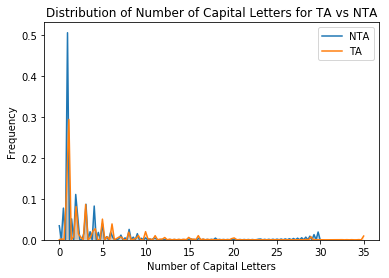

In [344]:
ax = sns.kdeplot(data[data['judgement'] == 0]['num_caps'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['num_caps'], shade = True, label="TA")
ax.set_xlabel('Number of Capital Letters')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Number of Capital Letters for TA vs NTA')

fig = ax.get_figure()

## Feature: Number of curse words
The cursewords are taken from a text file on github containing all of the words that Google blocks. Reader beware -- reading this list is not advisable if you're not one for profanity! It's really quite uncomfortable to read.

In [374]:
# get google's list of curse words
cursewords = [re.sub(r'^b|\\n|\'', '',str(line)) for line in urllib.request.urlopen('https://raw.githubusercontent.com/RobertJGabriel/Google-profanity-words/master/list.txt')]

cursewords.extend(['gtfo', 'dickish'])
cursewords.pop(cursewords.index('asshole'))

'asshole'

In [380]:
def count_curses(sentence):
    return sum(1 for word in re.split(r'[.,"!()\'?]+|\s|\n', sentence) if word.lower() in cursewords)

In [381]:
print(data.description.iloc[10])
count_curses(data.description.iloc[10])

I'm a college student. My first roommate dropped out in October, and I got a new one to start he 2nd semester. He's the worst. Here's some of the undesirable qualities about him.

* Incredible snoring. I had no clue someone could snore this loud and not wake his or her self up until now. He sounds like a fucking animal sometimes. He tops it off by moaning in his sleep after the loudest snores. You can hear it throughout my entire suite, even with doors clothes. I haven't approached him about it, but I know he knows about it. A friend of his spent the night in our room a few weekends ago, and one of the first things she said was "have you told him about your snoring??" He kind of brushed it off and quickly changed the subject. So he knows. He has to know. It's too loud not to know. This is fine, you can't help snoring sometimes. That being said, he sleeps *12 fucking hours a day*. On Mondays like today he sleeps for 8 hours then naps for 4 hours during the day. Nothing like coming to yo

4

In [382]:
data.apply(lambda x: count_curses(x.description), axis=1)

id
1fy0bx    1
1ytxov    0
1yu29c    0
1yu8hi    0
1yuc78    0
1yugsc    1
1yuj95    0
1yukgb    0
1yux10    0
1yux60    0
1yvb3n    4
1yvd1v    1
1yvjiw    0
1yvl8z    0
1yw0t4    2
1yx8vp    0
1yxbgt    0
1yxnp3    0
1yy4gj    0
1yy4n3    4
1yy70j    1
1yyach    0
1yyfen    4
1yz27l    0
1yztv6    3
1yzwl6    0
1z02r7    1
1z245r    3
1z2r6y    3
1z313z    0
         ..
73o31i    7
74zqrn    1
75b49v    2
7k0k9i    2
7l2hf4    0
7lcgz6    2
7lgtb6    0
7lgv4y    0
7lhlsb    0
7lkaat    6
7ll4i6    0
7ln48m    0
7loai6    3
7lohkj    0
7lqo5n    0
7lr6me    1
7lse9n    0
7lsi7c    0
7lsmyq    2
7ltuvf    0
7lv0l5    4
7lvnw3    0
7lwm8z    0
7lytbs    0
7lz0kj    3
7lz0za    0
7lz93l    0
7lzm9c    1
7lzx65    4
7m3pjr    0
Length: 2011, dtype: int64

In [383]:
data['curse_count'] = _

In [384]:
data.curse_count.value_counts()

0     1131
1      416
2      196
3       95
4       66
5       41
6       23
7       14
8        9
9        7
10       2
11       2
12       2
18       2
20       1
14       1
15       1
19       1
22       1
Name: curse_count, dtype: int64

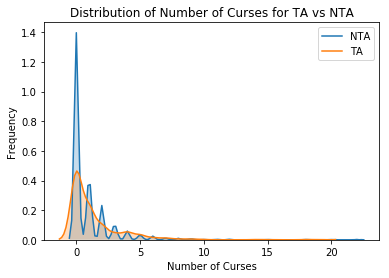

In [385]:
ax = sns.kdeplot(data[data['judgement'] == 0]['curse_count'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['curse_count'], shade = True, label="TA")
ax.set_xlabel('Number of Curses')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Number of Curses for TA vs NTA')

fig = ax.get_figure()

## Feature: Number of pronouns
We'll split this up by first person (personal) pronouns and third person pronouns.

### First Person

In [389]:
first_person_pronouns = ['I', 'me', 'we', 'us', 'myself', 
                        'ourselves', 'my', 'mine', 'ours']
def count_fpp(sentence):
    return sum(1 for word in re.split(r'[.,"!()\'?]+|\s|\n', sentence) if word.lower() in first_person_pronouns)

data['fpp_count'] = data.apply(lambda x: count_fpp(x.description), axis=1)

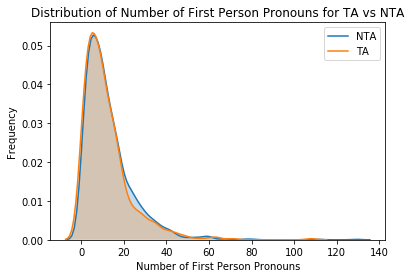

In [392]:
ax = sns.kdeplot(data[data['judgement'] == 0]['fpp_count'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['fpp_count'], shade = True, label="TA")
ax.set_xlabel('Number of First Person Pronouns')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Number of First Person Pronouns for TA vs NTA')

fig = ax.get_figure()

### Third Person

In [391]:
third_person_pronouns = ['she', 'her', 'he', 'him', 'they'
                            'them', 'himself', 'herself',
                            'themselves', 'his', 'hers',
                            'theirs']
def count_tpp(sentence):
    return sum(1 for word in re.split(r'[.,"!()\'?]+|\s|\n', sentence) if word.lower() in third_person_pronouns)
data['tpp_count'] = data.apply(lambda x: count_tpp(x.description), axis=1)

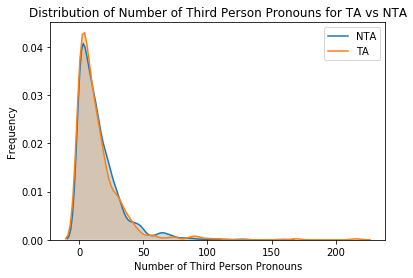

In [393]:
ax = sns.kdeplot(data[data['judgement'] == 0]['tpp_count'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['tpp_count'], shade = True, label="TA")
ax.set_xlabel('Number of Third Person Pronouns')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Number of Third Person Pronouns for TA vs NTA')

fig = ax.get_figure()

### Difference in first and third person pronoun frequency

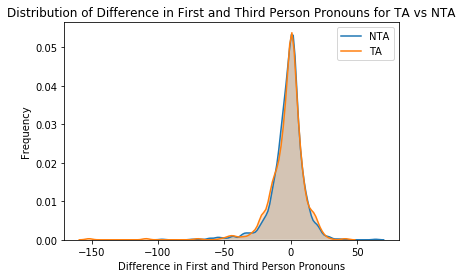

In [394]:
data['ftpp_diff'] = data.apply(lambda x: x.fpp_count - x.tpp_count, axis=1)

ax = sns.kdeplot(data[data['judgement'] == 0]['ftpp_diff'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['ftpp_diff'], shade = True, label="TA")
ax.set_xlabel('Difference in First and Third Person Pronouns')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Difference in First and Third Person Pronouns for TA vs NTA')

fig = ax.get_figure()

## Feature: WIBTA
WIBTA = 'would I be the asshole'

Does it make a difference if they ask before doing?

In [400]:
data.title.apply(lambda x: True if 'wibta' in x.lower() else False).value_counts()

False    2008
True        3
Name: title, dtype: int64

There are so few that it's not even worth putting in the data frame!

## Feature: Number of words per sentence
If you're more wordy, does that make you more/less of TA? 

In [428]:
def avg_num_words(description):
    lens = []
    for sentence in re.split(r'[.?!]+', description):
        # split gets the list of words, calling len on that gets the number of words
        # add to the list of sentence lengths
        lens.append(sum(1 for word in (re.split(r'[.!?,\"-]|\s', sentence)) if word != ''))
    # calculate and return avg
    return sum(lens)/(len(lens) - 1) if len(lens) > 1 else sum(lens)

data['avg_word_per_sent'] = data['description'].apply(lambda x: avg_num_words(x))

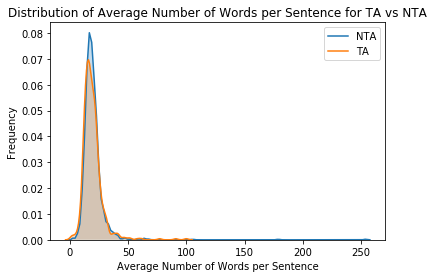

In [430]:
ax = sns.kdeplot(data[data['judgement'] == 0]['avg_word_per_sent'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['avg_word_per_sent'], shade = True, label="TA")
ax.set_xlabel('Average Number of Words per Sentence')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Average Number of Words per Sentence for TA vs NTA')

fig = ax.get_figure()

## Feature: Sentiment
Does the emotion conveyed in the title or in the description differ based on if the post is a TA post or a NTA post?

We'll try 3 different libraries with sentiment analysis: TextBlob, VADER, and Afinn. After calculating sentiment measures, then we'll visualize any differences in distribution across TA and NTA posts.

### Textblob


#### Title Sentiment

In [69]:
import textblob

# If you want subjectivity, set polarity to False
def sentiment_tb(sentence, polarity=True):
    sentence = re.sub(r'[\[AITait\]]{4,6}:?\s', '', sentence)
    if polarity == False:
        return textblob.TextBlob(sentence).sentiment.subjectivity
    return textblob.TextBlob(sentence).sentiment.polarity

data['title_pol'] = data['title'].apply(lambda x: sentiment_tb(x))
data['title_subj'] = data['title'].apply(lambda x: sentiment_tb(x, polarity=False))

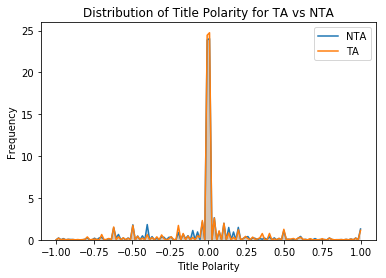

In [223]:
ax = sns.kdeplot(data[['title_pol', 'judgement']][data['judgement'] == 0]['title_pol'], shade = True, label="NTA")
ax = sns.kdeplot(data[['title_pol', 'judgement']][data['judgement'] == 1]['title_pol'], shade = True, label="TA")
ax.set_xlabel('Title Polarity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Title Polarity for TA vs NTA')

fig = ax.get_figure()

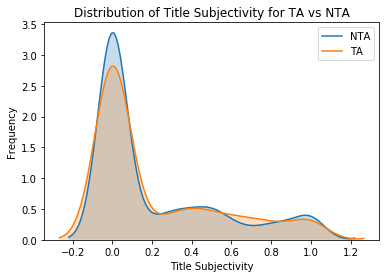

In [224]:
ax = sns.kdeplot(data[['title_subj', 'judgement']][data['judgement'] == 0]['title_subj'], shade = True, label="NTA")
ax = sns.kdeplot(data[['title_subj', 'judgement']][data['judgement'] == 1]['title_subj'], shade = True, label="TA")
ax.set_xlabel('Title Subjectivity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Title Subjectivity for TA vs NTA')

fig = ax.get_figure()

#### Description Sentiment

In [80]:
data['desc_pol'] = data['description'].apply(lambda x: sentiment_analysis(x))
data['desc_subj'] = data['description'].apply(lambda x: sentiment_analysis(x, polarity=False))

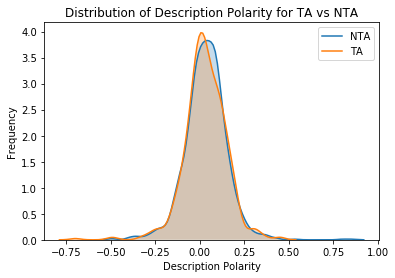

In [225]:
ax = sns.kdeplot(data[['desc_pol', 'judgement']][data['judgement'] == 0]['desc_pol'], shade = True, label="NTA")
ax = sns.kdeplot(data[['desc_pol', 'judgement']][data['judgement'] == 1]['desc_pol'], shade = True, label="TA")
ax.set_xlabel('Description Polarity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Description Polarity for TA vs NTA')

fig = ax.get_figure()

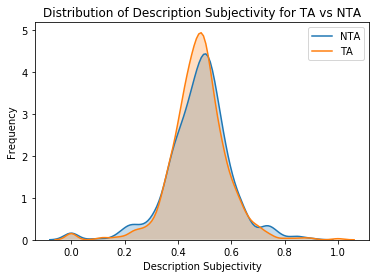

In [83]:
ax = sns.kdeplot(data[['desc_subj', 'judgement']][data['judgement'] == 1]['desc_subj'], shade = True, label="NTA")
ax = sns.kdeplot(data[['desc_subj', 'judgement']][data['judgement'] == 0]['desc_subj'], shade = True, label="TA")
ax.set_xlabel('Description Subjectivity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Description Subjectivity for TA vs NTA')

fig = ax.get_figure()

#### Sentiment Similarity

In [84]:
data['pol_similarity'] = data.apply(lambda x: x['title_pol'] - x['desc_pol'], axis=1)
data['subj_similarity'] = data.apply(lambda x: x['title_subj'] - x['desc_subj'], axis=1)

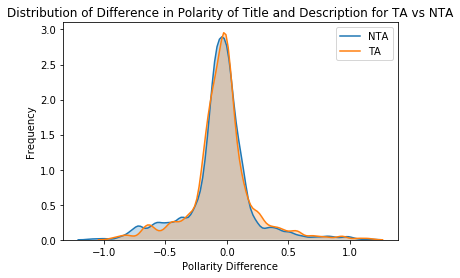

In [226]:
ax = sns.kdeplot(data[['pol_similarity', 'judgement']][data['judgement'] == 0]['pol_similarity'], shade = True, label="NTA")
ax = sns.kdeplot(data[['pol_similarity', 'judgement']][data['judgement'] == 1]['pol_similarity'], shade = True, label="TA")
ax.set_xlabel('PolIarity Difference')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Difference in Polarity of Title and Description for TA vs NTA')

fig = ax.get_figure()

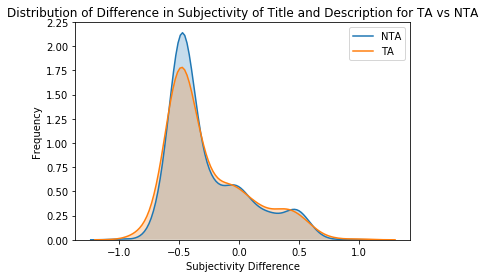

In [227]:
ax = sns.kdeplot(data[['subj_similarity', 'judgement']][data['judgement'] == 0]['subj_similarity'], shade = True, label="NTA")
ax = sns.kdeplot(data[['subj_similarity', 'judgement']][data['judgement'] == 1]['subj_similarity'], shade = True, label="TA")
ax.set_xlabel('Subjectivity Difference')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Difference in Subjectivity of Title and Description for TA vs NTA')

fig = ax.get_figure()

### VADER

In [107]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 3.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [108]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [115]:
# fast
data['title_vader'] = data['title'].apply(lambda x:analyser.polarity_scores(x)['compound'] )
# takes a minute
data['desc_vader'] = data['description'].apply(lambda x:analyser.polarity_scores(x)['compound'] )

In [118]:
data['vader_similarity'] = data.apply(lambda x: x.title_vader - x.desc_vader, axis=1)

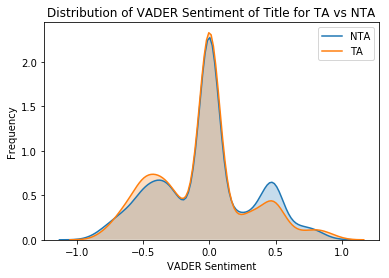

In [228]:
ax = sns.kdeplot(data[data['judgement'] == 0]['title_vader'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['title_vader'], shade = True, label="TA")
ax.set_xlabel('VADER Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of VADER Sentiment of Title for TA vs NTA')

fig = ax.get_figure()

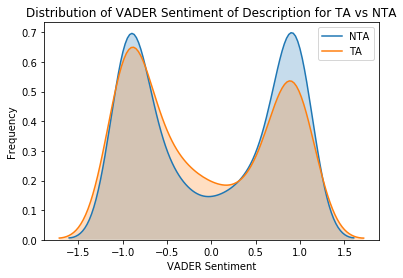

In [229]:
ax = sns.kdeplot(data[data['judgement'] == 0]['desc_vader'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['desc_vader'], shade = True, label="TA")
ax.set_xlabel('VADER Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of VADER Sentiment of Description for TA vs NTA')

fig = ax.get_figure()

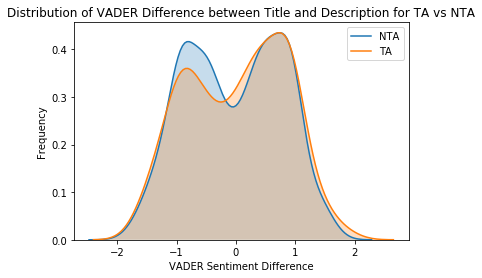

In [230]:
ax = sns.kdeplot(data[data['judgement'] == 0]['vader_similarity'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['vader_similarity'], shade = True, label="TA")
ax.set_xlabel('VADER Sentiment Difference')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of VADER Difference between Title and Description for TA vs NTA')

fig = ax.get_figure()

### Afinn

In [120]:
!pip install afinn

# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

     |████████████████████████████████| 61kB 3.5MB/s eta 0:00:011
  Created wheel for afinn: filename=afinn-0.1-cp37-none-any.whl size=53454 sha256=9c8602ea923350f59fd42f7e073a7d0e3907c7b8dde8041910fb894a85b4683b
  Stored in directory: /Users/hannah/Library/Caches/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


4.0

In [126]:
data['title_af'] = data['title'].apply(lambda x: af.score(x))
data['desc_af'] = data['description'].apply(lambda x: af.score(x))
data['af_similarity'] = data.apply(lambda x: x.title_af - x.desc_af, axis=1)

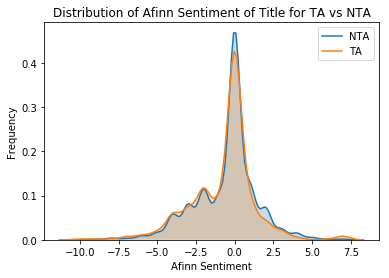

In [231]:
ax = sns.kdeplot(data[data['judgement'] == 0]['title_af'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['title_af'], shade = True, label="TA")
ax.set_xlabel('Afinn Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Afinn Sentiment of Title for TA vs NTA')

fig = ax.get_figure()

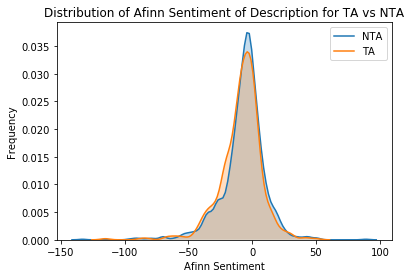

In [232]:
ax = sns.kdeplot(data[data['judgement'] == 0]['desc_af'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['desc_af'], shade = True, label="TA")
ax.set_xlabel('Afinn Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Afinn Sentiment of Description for TA vs NTA')

fig = ax.get_figure()

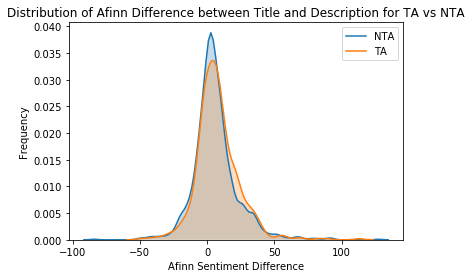

In [233]:
ax = sns.kdeplot(data[data['judgement'] == 0]['af_similarity'], shade = True, label="NTA")
ax = sns.kdeplot(data[data['judgement'] == 1]['af_similarity'], shade = True, label="TA")
ax.set_xlabel('Afinn Sentiment Difference')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Afinn Difference between Title and Description for TA vs NTA')

fig = ax.get_figure()

## Feature(s): Vectorization
This hopefully will be more telling than the previous features! We have hope since the other features were more heavy handed in their creation, but we can more finely tune the creation of features here.

In [156]:
# first, a little more processing to prepare data for vectorization

from nltk.corpus import stopwords

stop_words = ['aita', 'asshole', 'nta', 'ta', 'reddit', 'I']
stop_words.extend(set(stopwords.words('english')))

In [157]:
stop_words

['aita',
 'asshole',
 'nta',
 'ta',
 'reddit',
 'I',
 'than',
 'through',
 'shan',
 'because',
 'this',
 's',
 'of',
 "weren't",
 "couldn't",
 'to',
 'weren',
 'her',
 "she's",
 'there',
 'don',
 'during',
 'm',
 'then',
 'other',
 'he',
 'any',
 'they',
 'has',
 'had',
 'now',
 'more',
 'a',
 'why',
 'about',
 'for',
 'between',
 'after',
 'up',
 'theirs',
 'are',
 'yourselves',
 'and',
 'll',
 "needn't",
 'those',
 'wouldn',
 "you'd",
 "didn't",
 'once',
 'ours',
 'herself',
 'will',
 'does',
 "wasn't",
 'nor',
 'yourself',
 "shan't",
 'being',
 'most',
 'them',
 'just',
 'd',
 'do',
 'further',
 'some',
 'y',
 'which',
 'ma',
 'ourselves',
 "you're",
 'above',
 'again',
 'only',
 'into',
 'on',
 'was',
 'as',
 'each',
 "hadn't",
 'against',
 'she',
 'below',
 'hasn',
 "mustn't",
 'from',
 'here',
 'until',
 'me',
 'couldn',
 'haven',
 'our',
 'you',
 'these',
 'out',
 'have',
 'whom',
 'am',
 'should',
 'be',
 'before',
 'my',
 'how',
 'by',
 'yours',
 'hers',
 'it',
 'needn',
 'mys

In [494]:
def remove_stopwords_and_punc(sentence):
    new_sentence = ''
    for punc in ['.', '!', '?', '@', '#', '$', 
                 '%', '^', '&', '*', '(', ')', 
                '<', '>', '/', '\\', '"', ';',
                ':', '-', '_', '\n', '[', ']',
                ',']:
        sentence = sentence.replace(punc, ' ')
    for word in sentence.split(' '):
        if word.lower() not in stop_words:
            new_sentence += word.lower() + ' '
    return new_sentence[:-1]

print(data['title'].iloc[10])
remove_stopwords_and_punc(data['title'].iloc[10])

[AITA] Hockey Fan


'  hockey fan'

In [495]:
data['processed_titles'] = data['title'].apply(lambda x: remove_stopwords_and_punc(x))

In [496]:
data['processed_description'] = data['description'].apply(lambda x: remove_stopwords_and_punc(x))

I found a description that has a url in it! That'll mess up our vectorization. We should remove any urls from descriptions, and then any rows that end up having empty descriptions after that. 

In [ ]:
# remove urls from descriptions
def remove_reddit_urls(description):
    desc = re.sub(r'\n', '', description)
    return re.sub(r'(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/|:\/\/www.)?reddit.com/?[a-zA-Z0-9/_\?=]*', '',desc)

data['description'] = data.apply(lambda x: remove_reddit_urls(x.description), axis=1)

# get rid of description-less rows
data.drop(data[data['description'].str.len() == 0].index, inplace=True)


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer 

def lemmetize(text):
    # initialize lemetizer & tokenize sentence
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    return [lemmatizer.lemmatize(w) for w in words]

data['lemmetized'] = data.apply(lambda x: lemmetize(x.processed_description), axis=1)

So as to avoid data leakage, we'll first train-test-split our data, then we'll get into the vectorization.

In [521]:
from sklearn.model_selection import train_test_split

feat = ['length', 'title_pol', 'title_subj', 'desc_pol', 'desc_subj',
       'pol_similarity', 'subj_similarity', 'title_vader', 'desc_vader',
       'vader_similarity', 'title_af', 'desc_af', 'af_similarity',
       'processed_titles', 'exclam_count', 'question_count', 'quote_count',
       'dollar_count', 'ellipse_count', 'num_caps', 'curse_count', 'count_fpp',
       'fpp_count', 'tpp_count', 'ftpp_diff', 'avg_word_per_sent',
       'processed_description', 'lemmetized']
X_train, X_test, y_train, y_test = train_test_split(data[feat], data['judgement'], 
                                                    test_size = .33, random_state=42)

### TF-IDF of Descriptions

In [506]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [522]:
cv = CountVectorizer()
word_count_vector=cv.fit_transform(X_train['processed_description'])

In [523]:
word_count_vector.shape

(1346, 14026)

Let's look at what the idf is for each word in the corpus.

In [524]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
like,1.498773
get,1.629166
time,1.667495
one,1.721000
would,1.739490
said,1.784013
know,1.825513
want,1.867041
got,1.895717
really,1.921501


In [527]:
tf_idf_vector=tfidf_transformer.transform(cv.transform(X_train['processed_description']))

Looking at just one row:

In [528]:
feature_names = cv.get_feature_names()

#print the scores for the first vector
df = pd.DataFrame(tf_idf_vector[0].T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
entertain,0.526223
sister,0.306104
computer,0.203367
tv,0.196681
11,0.187799
games,0.185844
tonight,0.181320
eat,0.169443
mother,0.142635
parents,0.136894


Making a dataframe for all the words (so we can do some dimensionality reduction in a minute).

In [542]:
df = pd.DataFrame(tf_idf_vector.T.todense(), index=feature_names)
df.transpose()

,00,000,00am,00pmroommate,01,02,03,0493477,05,07,...,zipped,zone,zoned,zones,zoning,zonked,zoomed,zooms,zputnlw,ćuprija
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we'll do some LSA (latent semantic analysis, or in general/non-NLP-terms, SVD) to get a dense matrix so we can maybe reduce dimensionality and avoid the curse of dimensionality.

In [529]:
from sklearn.decomposition import TruncatedSVD

In [559]:
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
svd.fit(df.transpose())

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=7,
       random_state=42, tol=0.0)

In [560]:
sum(svd.explained_variance_ratio_)

0.22774693176172997

I'm hesitant to include too many components (we wanted to lower the risks of the curse of dimensionality!), so we'll have to settle for this low explained variance :(